# Importing Modules

In [ ]:
import numpy as np
import os
import pandas as pd
import sklearn
from functools import partial

import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, BatchNormalization, Flatten, Dense, MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.datasets.fashion_mnist import load_data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Loading the Datasets

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = load_data()

In [ ]:
print('X_train_full shape:', X_train_full.shape)
print('y_train_full shape:', y_train_full.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Data Pre-processing

## Data Splitting 

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.  #Normalizing
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_valid.shape)

X_train shape: (55000, 28, 28)
y_train shape: (55000,)
X_valid shape: (5000, 28, 28)
y_valid shape: (5000,)


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data Visualization

Coat


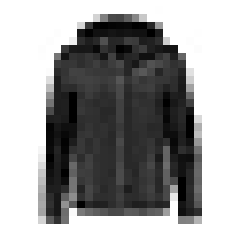

In [ ]:
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

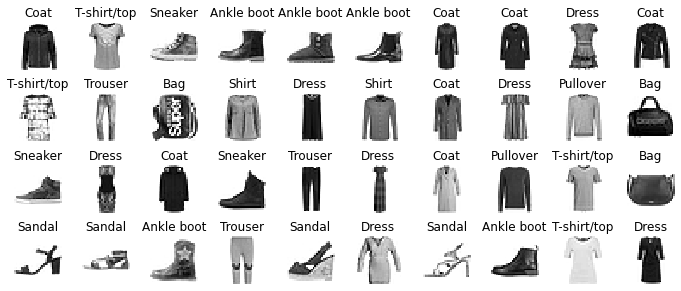

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_valid.shape)

X_train shape: (55000, 28, 28, 1)
y_train shape: (55000,)
X_valid shape: (5000, 28, 28, 1)
y_valid shape: (5000,)


# Model Building

In [ ]:
EPOCHS = 50
BS = 32
LR = 0.001

In [ ]:
DefaultConv2D = partial(Conv2D, kernel_size=3, activation='relu', padding='SAME')

def FashionNet(DefaultConv2D):

  model = Sequential([
              DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
              BatchNormalization(),
              Dropout(0.15),
              DefaultConv2D(128),
              MaxPooling2D(pool_size=2),
              BatchNormalization(),
              Dropout(0.15),
              DefaultConv2D(256),
              MaxPooling2D(pool_size=2),
              BatchNormalization(),
              Dropout(0.15),
              DefaultConv2D(512),
              MaxPooling2D(pool_size=2),
              BatchNormalization(),
              Dropout(0.15),
              DefaultConv2D(1024),
              MaxPooling2D(pool_size=2),
              BatchNormalization(),
              Dropout(0.15),
              Flatten(),
              Dense(512, activation='relu'),
              Dropout(0.5),
              Dense(256, activation='relu'),
              Dropout(0.5),
              Dense(128, activation='relu'),
              Dropout(0.5),
              Dense(64, 'relu'),
              Dense(10, activation='softmax')       
  ])

  sgd = SGD(learning_rate=LR, momentum=0.9)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

  model.summary()

  return model


# Calling a function
FashionNet = FashionNet(DefaultConv2D)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 128)      

# Model Training

In [ ]:
H = FashionNet.fit(X_train, y_train, 
                   epochs=EPOCHS,
                   validation_data=(X_valid, y_valid),
                   batch_size=BS,
                   steps_per_epoch=len(X_train) // BS)

Epoch 1/50
1718/1718 [==============================] - 30s 17ms/step - loss: 1.5060 - accuracy: 0.4565 - val_loss: 0.5517 - val_accuracy: 0.7992
Epoch 2/50
1718/1718 [==============================] - 29s 17ms/step - loss: 0.6664 - accuracy: 0.7506 - val_loss: 0.4479 - val_accuracy: 0.8294
Epoch 3/50
1718/1718 [==============================] - 29s 17ms/step - loss: 0.5460 - accuracy: 0.8000 - val_loss: 0.3648 - val_accuracy: 0.8678
Epoch 4/50
1718/1718 [==============================] - 29s 17ms/step - loss: 0.4687 - accuracy: 0.8335 - val_loss: 0.3332 - val_accuracy: 0.8806
Epoch 5/50
1718/1718 [==============================] - 30s 17ms/step - loss: 0.4165 - accuracy: 0.8583 - val_loss: 0.3149 - val_accuracy: 0.8902
Epoch 6/50
1718/1718 [==============================] - 30s 17ms/step - loss: 0.3836 - accuracy: 0.8678 - val_loss: 0.2814 - val_accuracy: 0.8970
Epoch 7/50
1718/1718 [==============================] - 30s 17ms/step - loss: 0.3553 - accuracy: 0.8790 - val_loss: 0.2983 -

# Prediction using a Model

In [ ]:
pred = FashionNet.predict(X_test)
predictions = np.argmax(pred, axis=1)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
part_predictions = []
part_actual_labels = []
for i, j in zip(predictions[:10], y_test[:10]):
  part_predictions.append(class_names[i])
  part_actual_labels.append(class_names[j])

In [ ]:
partial_data = {'Predictions' : part_predictions, 'Actual Labels' : part_actual_labels}
part_predict = pd.DataFrame(partial_data)
part_predict

,Predictions,Actual Labels
0,Ankle boot,Ankle boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
5,Trouser,Trouser
6,Coat,Coat
7,Shirt,Shirt
8,Sandal,Sandal
9,Sneaker,Sneaker


In [ ]:
n_img = 5
X_new = X_test[:n_img]

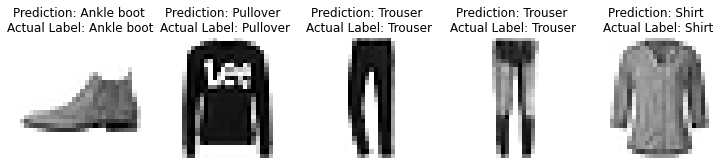

In [ ]:
plt.figure(figsize=(2.5 * n_img, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, n_img, index + 1)
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title(f'Prediction: {class_names[predictions[index]]} \nActual Label: {class_names[y_test[index]]}', fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Model Evaluation

In [ ]:
FashionNet.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2260 - accuracy: 0.9308


[0.22604931890964508, 0.9308000206947327]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
accuracy_score(y_test, predictions)

0.9308

## Loss/Accuracy vs Epochs Plot

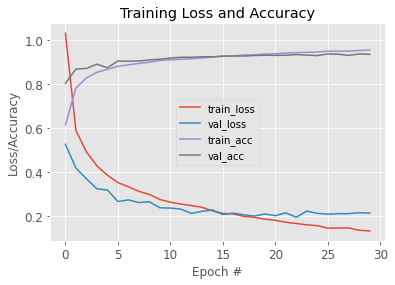

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center")
plt.show()
# plt.savefig("/content/drive/MyDrive/M1_Assignment/Plots/plot-10.png")